In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


STEP 1: reading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import preprocessing #imported for standardization

In [3]:
datanotok, dataok =[], []
with open("/content/drive/MyDrive/DataScienceMidtermProject/LDAP.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

In [4]:
with open("/content/drive/MyDrive/DataScienceMidtermProject/MSSQL.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

In [5]:
with open("/content/drive/MyDrive/DataScienceMidtermProject/NetBIOS.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

In [6]:
new_data=[]
with open("/content/drive/MyDrive/DataScienceMidtermProject/Portmap.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

In [7]:
with open("/content/drive/MyDrive/DataScienceMidtermProject/Syn.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

In [8]:
with open("/content/drive/MyDrive/DataScienceMidtermProject/UDP.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

In [9]:
with open("/content/drive/MyDrive/DataScienceMidtermProject/UDPLag.csv") as fp:
  line = fp.readline()
  cnt = 1
  while line:
    if "BENIGN" in line: dataok.append(line)
    else: datanotok.append(line)
    line = fp.readline()
    cnt += 1

STEP 2: Data sampling

In [10]:
rok = random.sample(range(1, len(dataok)), 50000)
rnotok = random.sample(range(1, len(datanotok)), 50000)

In [11]:
columns = datanotok[0].replace('\n','').split(',')
new_data=[]
for i in rok:
  new_data.append(dataok[i].replace('\n','').split(','))
dataok = []
rok = []
for i in rnotok:
  new_data.append(datanotok[i].replace('\n','').split(','))
datanotok = []
rnotok = []

In [30]:
data_f = pd.DataFrame(new_data, columns=columns)
data_f.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,11607,192.168.50.6-74.208.236.171-57864-80-6,192.168.50.6,57864,74.208.236.171,80,6,2018-11-03 15:58:48.305425,7235139,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
1,621,172.217.11.10-192.168.50.8-443-59673-6,192.168.50.8,59673,172.217.11.10,443,6,2018-11-03 09:37:01.839439,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
2,10274,192.168.50.6-4.2.2.4-64559-53-17,192.168.50.6,64559,4.2.2.4,53,17,2018-11-03 14:37:48.284103,20741,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
3,8974,192.168.50.6-4.2.2.4-63516-53-17,192.168.50.6,63516,4.2.2.4,53,17,2018-11-03 15:31:48.115409,21065,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN
4,4806,192.168.50.9-8.8.8.8-42207-53-17,192.168.50.9,42207,8.8.8.8,53,17,2018-11-03 13:41:03.959387,100552889,10,...,2086756.2569884632,2996585.0,45466.0,48727146.5,37342943.389244296,75132595.0,22321698.0,0,0,BENIGN


STEP 3: DATA preprocess
- remove rows with nan value
- remove rows with infinity value
- remove columns that contains only zeros
- add 0 or 1 label
- standardization and normalization

In [31]:
result = data_f

In [27]:
def labelGenerator(label):
  if label=='BENIGN':
    return 0
  return 1

In [28]:
def standardization(df):
  std_scale = preprocessing.StandardScaler().fit(df[df.columns])
  df_std = std_scale.transform(df[df.columns])

  minmax_scale = preprocessing.MinMaxScaler().fit(df[df.columns])
  df_minmax = minmax_scale.transform(df[df.columns])

  print('Mean after standardization:\n first feautre={:.2f}, second feature={:.2f}'
        .format(df_std[:,0].mean(), df_std[:,1].mean()))
  print('\nStandard deviation after standardization:\nfirst feature={:.2f}, second feature={:.2f}'
        .format(df_std[:,0].std(), df_std[:,1].std()))
  print('Min-value after min-max scaling:\nfirst feature={:.2f}, second feature={:.2f}'
        .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
  print('\nMax-value after min-max scaling:\nfirst feature={:.2f}, second feature={:.2f}'
        .format(df_minmax[:,0].max(), df_minmax[:,1].max()))
  return df_minmax

In [32]:
result.drop(["SimillarHTTP", " Idle Std", "Flow ID", " Source IP", " Destination IP", " Timestamp"], axis=1, inplace=True)

# add 0 or 1 label
result[' Label'] = result[' Label'].apply(lambda t: labelGenerator(t))
result = result[result != ""].dropna()
result = result.astype(float)

# Drop all rows with NaN values
result=result.dropna()
result=result.dropna(axis=0)

# Drop all rows with infinity values
result = result[result != "infinity"].dropna()
result = result[result != np.inf].dropna()
result = result[result != -np.inf].dropna()

# remove columns that contains only zeros
result = result.loc[:, (result != 0).any(axis=0)]



# X and Y
Y = result[' Label']
X = result.drop(columns=[' Label'])

# standardizaion
X = standardization(X)


Mean after standardization:
 first feautre=0.00, second feature=-0.00

Standard deviation after standardization:
first feature=1.00, second feature=1.00
Min-value after min-max scaling:
first feature=0.00, second feature=0.00

Max-value after min-max scaling:
first feature=1.00, second feature=1.00


In [33]:
def Kvisualize(explained_variance):
  plt.plot(np.cumsum(explained_variance))

STEP 4: Principal Component Analysis (PCA)

- Calculate the Covariance Matrix

- Eigendecomposition on the Covariance Matrix

- Sort the Principal Components

- Calculate the Explained Variance

- Reduce the Data via the Principal Components

- Iterate on the Number of Principal Components

In [34]:
def PCA(data):
  standardized_data = (data - data.mean(axis = 0)) / data.std(axis = 0)
  covariance_matrix = np.cov(standardized_data, ddof = 0, rowvar = False)
  eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
  # np.argsort can only provide lowest to highest; use [::-1] to reverse the list
  order_of_importance = np.argsort(eigenvalues)[::-1] 

  # utilize the sort order to sort eigenvalues and eigenvectors
  sorted_eigenvalues = eigenvalues[order_of_importance]
  sorted_eigenvectors = eigenvectors[:,order_of_importance] # sort the columns

  # use sorted_eigenvalues to ensure the explained variances correspond to the eigenvectors
  explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
  k = 30 # select the number of principal components
  reduced_data = np.matmul(standardized_data, sorted_eigenvectors[:,:k]) # transform the original data
  total_explained_variance = sum(explained_variance[:k])
  Kvisualize(explained_variance)
  return reduced_data

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


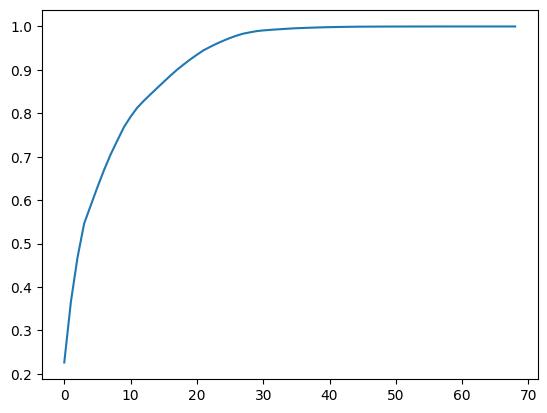

In [35]:
X = PCA(X)

In [36]:
X = np.real(X)

STEP 5: MODEL

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=42)

In [38]:
print(X_train)
print("*****")
print(X_test)
print("*****")
print(y_train)
print("*****")
print(y_test)

[[-1.23949698e+00  7.56354569e-01  3.61265250e-02 ... -3.54302283e-02
   1.69090278e-02  2.53966425e-01]
 [ 1.60949792e+01  6.88309633e+00  4.19036001e-01 ...  8.75044987e-01
   1.68275312e-02  1.98264761e-01]
 [-1.24166294e+00  7.05056154e-01 -1.54823162e-02 ...  2.70759594e-04
   4.74982397e-02 -9.76062971e-02]
 ...
 [-2.11000761e+00  2.77046441e+00 -5.73572549e-01 ...  2.68471766e-01
  -7.38911972e-04  2.25931780e-01]
 [-1.16336517e+00 -2.66010093e+00  4.81862003e-01 ...  3.36238124e-01
  -1.66972681e-01 -2.27101892e-01]
 [ 8.13606995e+00 -4.01594941e-01 -1.36203423e+00 ... -3.44677944e-01
  -4.61640782e-02 -4.52735327e-01]]
*****
[[-2.77482443  6.10959401 -1.23553409 ... -0.3285642   0.01145904
   0.57836467]
 [-1.38893509 -2.01342947  0.25373102 ... -1.03137358 -0.30925486
  -0.28610878]
 [-2.65136546  7.7792695  -1.30913871 ... -0.40357861  0.04073903
   0.48480801]
 ...
 [-0.62126236 -3.05626944  0.63248236 ... -0.77581531 -0.20323966
  -0.36883144]
 [-1.7715101   1.74992853 -0.

In [39]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [40]:
y_pred= classifier.predict(X_test)

In [41]:
print(list(y_pred))

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,

In [42]:
print(list(y_test))

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,

In [43]:
counter = 0
y_test = list(y_test)
for i in range(0, len(y_pred)):
  if y_pred[i]==y_test[i]:
    counter += 1
print(counter/len(y_pred))
print(counter)
print(len(y_pred))

0.9992610837438424
48684
48720


In [44]:
ok, notok = 0, 0
for val in Y:
  if val == 0:
    ok += 1
  else:
    notok += 1
print(ok, notok)

49417 48022


In [45]:
counter, all = 0, 0
for i in range(len(y_test)):
  if y_test[i]==0 and y_pred[i]==0:
    counter += 1
    all+=1
  elif y_test[i]==0:
    all += 1
print(counter, all)
print("true positive : " , counter/all)

24696 24725
true positive :  0.9988270980788675


In [46]:
counter, all = 0, 0
for i in range(len(y_test)):
  if y_test[i]==1 and y_pred[i]==1:
    counter += 1
    all+=1
  elif y_test[i]==1:
    all +=1
print(counter, all)
print( "true negative : " , counter/all)

23988 23995
true negative :  0.9997082725567826
